# # **Digit Recognizer using Artificial Neural Networks (ANN) **

The main goal of this notebook is to present a solution for Kaggle's Digit Recognizer competition using Artificial Neural Networks (ANN). 

In this competition, the objective is to correctly identify digits from a dataset of tens of thousands of handwritten images.


You can have more informations about the competition at: https://www.kaggle.com/competitions/digit-recognizer

# **Import librairies**

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# **Import the data**

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
X_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# **Exploring the data**

In [3]:
# Gain some basic informations about the data
print("Dataset columns: ", train.columns)
print(train.info())

Dataset columns:  Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [4]:
# Separate features from the target ("label" column here)
X = train.drop('label', axis = 1)
y = train.label                   #target attribute

# **Normalize & split the data**

In [5]:
#features values must range from 0 to 1
X = X / 255.0    
X_test = X_test/255.0

In [6]:
# split the data into training set and validation set

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.80, random_state = 42)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)


# **Visualize some training examples**

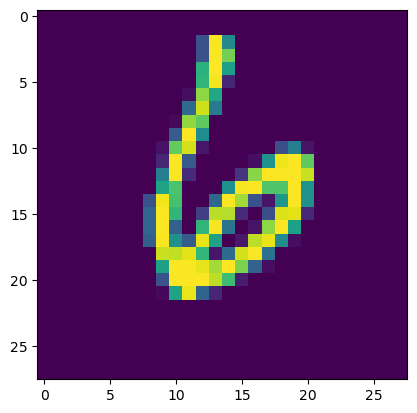

In [8]:
# resize the data to it's original form to visualize
X_train_reshaped = X_train.values.reshape(-1, 28, 28)
plt.imshow(X_train_reshaped[0])

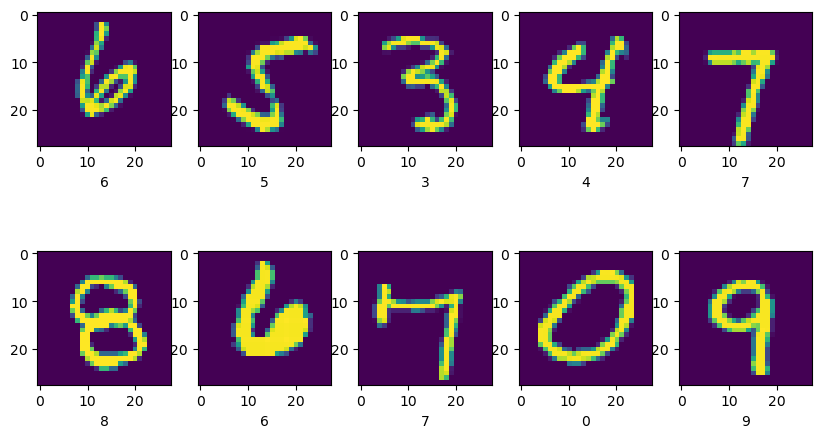

In [9]:
#visualize the first 10 images and their label

plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

# **Building models**

In [10]:
# try three models with different architecture of layers
input_shape = [X_train.shape[1]]

model_1 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 350, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 165, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 64, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 10, activation = 'linear')
])

model_2 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 80, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    Dense(units = 10, activation = 'linear')
])

model_3 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 560, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 700, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 430, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 120, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 10, activation = 'linear')
])

Training model_1...
Done!

Training model_2...
Done!

Training model_3...
Done!



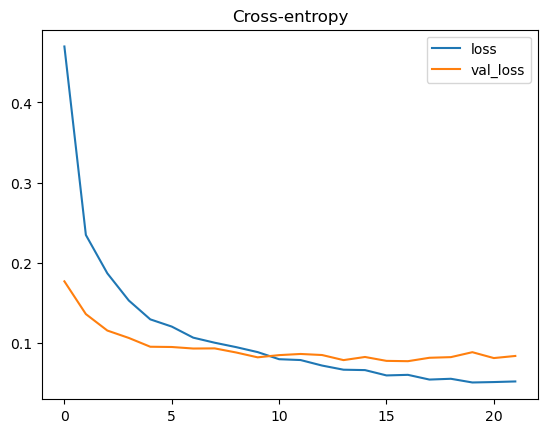

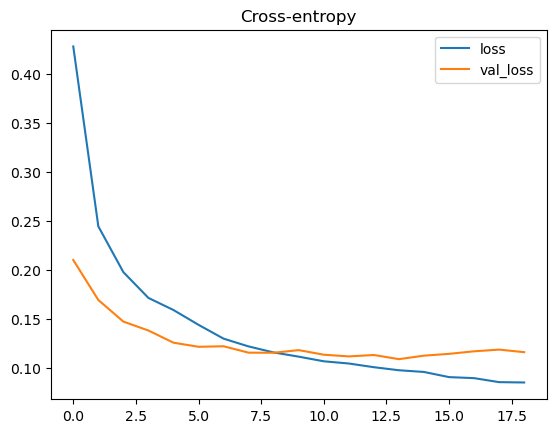

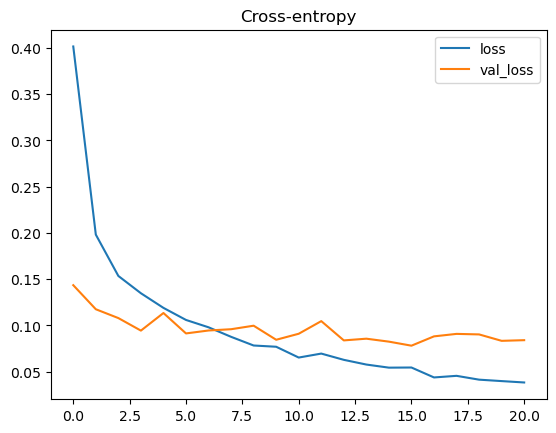

In [11]:
# evaluate each model 

models = [model_1, model_2, model_3]
nn_train_loss = []
nn_cv_loss    = []

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

for model in models:
    model.compile(loss = SparseCategoricalCrossentropy(from_logits= True),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
               metrics = ['accuracy'])
    
    print(f"Training model_{models.index(model) + 1}...")
    history = model.fit(X_train, y_train, epochs = 50,
           validation_data = (X_val, y_val),
           batch_size = 50,
           callbacks=[early_stopping],
           verbose = 0
           )
    
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
    #history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
    
    print("Done!\n")

In [12]:
# It's seems like model_1 performs better
best_model = model_2

# train on all the dataset
best_model.fit(X, y, callbacks=[early_stopping], batch_size = 50, epochs = 50)

#predict
test_predictions = tf.nn.softmax(best_model.predict(X_test)).numpy()

Epoch 1/50
840/840 [==============================] - 3s 4ms/step - loss: 0.1109 - accuracy: 0.9654
Epoch 2/50
840/840 [==============================] - 3s 4ms/step - loss: 0.1066 - accuracy: 0.9651
Epoch 3/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0974 - accuracy: 0.9685
Epoch 4/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0958 - accuracy: 0.9685
Epoch 5/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0925 - accuracy: 0.9701
Epoch 6/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0892 - accuracy: 0.9701
Epoch 7/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0864 - accuracy: 0.9717
Epoch 8/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0883 - accuracy: 0.9698
Epoch 9/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0847 - accuracy: 0.9721
Epoch 10/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0798 - accuracy: 0.9737

<AxesSubplot:title={'center':'Accuracy'}>

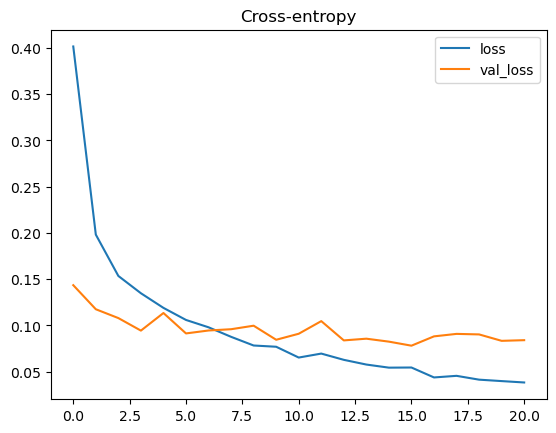

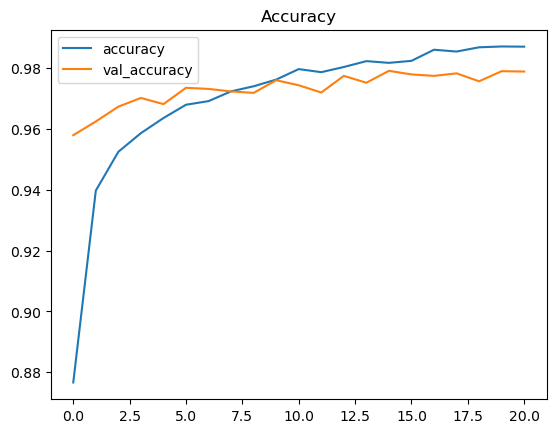

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [14]:
ImageId = []
Label = []
for i in range(len(test_predictions)):
    ImageId.append(i+1)
    Label.append(test_predictions[i].argmax())
    
submissions=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions.to_csv("submission.csv", index=False, header=True)